## KNN 概述

k-近邻（kNN, k-NearestNeighbor）算法是一种基本分类与回归方法，我们这里只讨论分类问题中的 k-近邻算法。

**一句话总结：近朱者赤近墨者黑！**

k 近邻算法的输入为实例的特征向量，对应于特征空间的点；输出为实例的类别，可以取多类。k 近邻算法假设给定一个训练数据集，其中的实例类别已定。分类时，对新的实例，根据其 k 个最近邻的训练实例的类别，通过多数表决等方式进行预测。因此，k近邻算法不具有显式的学习过程。

k 近邻算法实际上利用训练数据集对特征向量空间进行划分，并作为其分类的“模型”。 k值的选择、距离度量以及分类决策规则是k近邻算法的三个基本要素。




## KNN 场景

电影可以按照题材分类，那么如何区分**动作片**和**爱情片** 呢？

1. 动作片：打斗次数更多
2. 爱情片：亲吻次数更多 

基于电影中的亲吻、打斗出现的次数，使用 k-近邻算法构造程序，就可以自动划分电影的题材类型。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1534908639842_kQcpmyHyuD.jpg)

现在根据上面我们得到的样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到 k 个距离最近的电影。
假定 k=3，则三个最靠近的电影依次是， He's Not Really into Dudes 、 Beautiful Woman 和 California Man。  

knn 算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

## KNN 原理
>KNN 工作原理

1. 假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。  
2. 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。  
  * 计算新数据与样本数据集中每条数据的距离。
  * 对求得的所有距离进行排序（从小到大，越小表示越相似）。
  * 取前k（k 一般小于等于 20 ）个样本数据对应的分类标签。
3. 求k个数据中出现次数最多的分类标签作为新数据的分类。

> KNN 通俗理解

给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的 k 个实例，这 k 个实例的多数属于某个类，就把该输入实例分为这个类。

> KNN 开发流程

* 收集数据：任何方法  
* 准备数据：距离计算所需要的数值，最好是结构化的数据格式  * 分析数据：任何方法  
* 训练算法：此步骤不适用于 k-近邻算法  
* 测试算法：计算错误率  
* 使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理  

> KNN 算法特点

优点：精度高、对异常值不敏感、无数据输入假定  
缺点：计算复杂度高、空间复杂度高  
适用数据范围：数值型和标称型



## KNN Demo演示

Automatically created module for IPython interactive environment


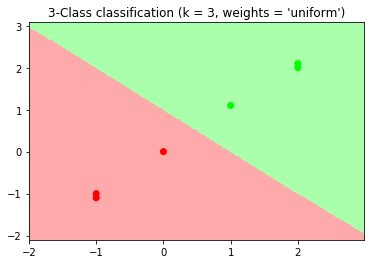

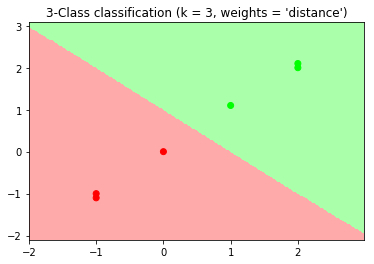

In [1]:
#!/usr/bin/python
# coding:utf8


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

n_neighbors = 3

# 导入一些要玩的数据
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # 我们只采用前两个feature. 我们可以使用二维数据集避免这个丑陋的切片
# y = iris.target

# print 'X=', type(X), X
# print 'y=', type(y), y

X = array([[-1.0, -1.1], [-1.0, -1.0], [0, 0], [1.0, 1.1], [2.0, 2.0], [2.0, 2.1]])
y = array([0, 0, 0, 1, 1, 1])

# print 'X=', type(X), X
# print 'y=', type(y), y

h = .02  # 网格中的步长

# 创建彩色的地图
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # 我们创建了一个knn分类器的实例，并适合数据。
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 绘制决策边界。为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## KNN 项目案例

### 项目案例1: 优化约会网站的配对效果
**项目概述** 

海伦使用约会网站寻找约会对象。经过一段时间之后，她发现曾交往过三种类型的人: 
* 不喜欢的人 
* 魅力一般的人 
* 极具魅力的人

她希望： 
1. 工作日与魅力一般的人约会 
2. 周末与极具魅力的人约会 
3. 不喜欢的人则直接排除掉

现在她收集到了一些约会网站未曾记录的数据信息，这更有助于匹配对象的归类。

**开发流程** 

* 收集数据：提供文本文件  
* 准备数据：使用 Python 解析文本文件  
* 分析数据：使用 Matplotlib 画二维散点图  
* 训练算法：此步骤不适用于 k-近邻算法  
* 测试算法：使用海伦提供的部分数据作为测试样本。    
  测试样本和非测试样本的区别在于：  
  + 测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。  
* 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

> 收集数据：提供文本文件

海伦把这些约会对象的数据存放在文本文件 datingTestSet2.txt 中，总共有 1000 行。海伦约会的对象主要包含以下 3 种特征：

* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数

文本文件数据格式如下： 

```python
40920   8.326976    0.953952    3  
14488   7.153469    1.673904    2  
26052   1.441871    0.805124    1  
75136   13.147394   0.428964    1  
38344   1.669788    0.134296    1
```

> 准备数据：使用 Python 解析文本文件
 
将文本记录转换为 NumPy 的解析程序



In [2]:
def file2matrix(filename):
    """
    Desc:
        导入训练数据
    parameters:
        filename: 数据文件路径
    return: 
        数据矩阵 returnMat 和对应的类别 classLabelVector
    """
    fr = open(filename)
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index, :] = listFromLine[0:3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector

> 分析数据：使用 Matplotlib 画二维散点图

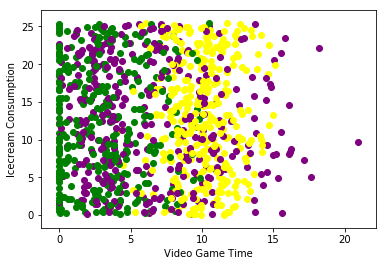

In [3]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(datingLabels)):
    if datingLabels[i] == 1:
        #  第i行数据，及returnMat[i:,0]及矩阵的切片意思是:i：i+1代表第i行数据,0代表第1列数据
        ax.scatter(datingDataMat[i:i+1, 1], 15*datingDataMat[i:i+1 ,2], color='purple')
    if datingLabels[i] == 2:
        ax.scatter(datingDataMat[i:i+1, 1], 15*datingDataMat[i:i+1, 2], color='green')
    if datingLabels[i] == 3:
        ax.scatter(datingDataMat[i:i+1, 1], 15*datingDataMat[i:i+1, 2], color='yellow')

plt.xlabel("Video Game Time")
plt.ylabel("Icecream Consumption")
plt.show()

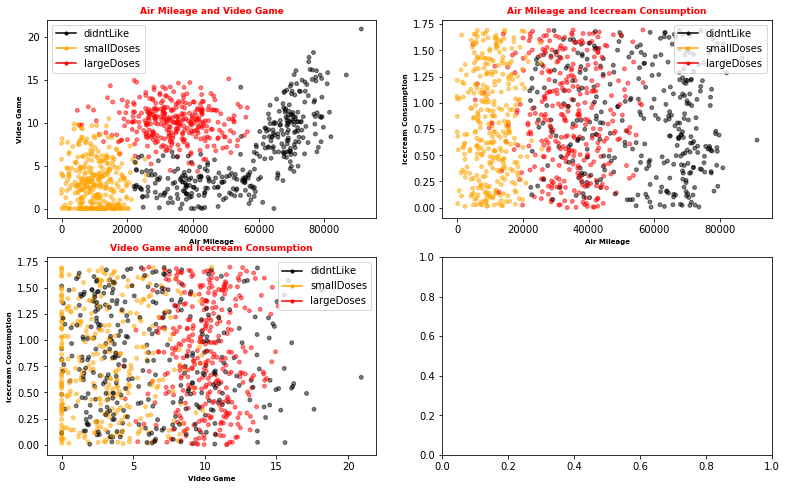

In [5]:
# -*- coding: UTF-8 -*-

from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量

Modify:
    2017-03-24
"""
def file2matrix(filename):
    """
    Desc:
        导入训练数据
    parameters:
        filename: 数据文件路径
    return: 
        数据矩阵 returnMat 和对应的类别 classLabelVector
    """
    fr = open(filename)
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index, :] = listFromLine[0:3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector

"""
函数说明:可视化数据

Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2017-03-24
"""
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    #font = FontProperties(fname=r"/usr/share/fonts/simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    #axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    #axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    #axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
    axs0_title_text = axs[0][0].set_title('Air Mileage and Video Game')
    axs0_xlabel_text = axs[0][0].set_xlabel('Air Mileage')
    axs0_ylabel_text = axs[0][0].set_ylabel('Video Game')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    #axs1_title_text = axs[0][1].set_title('每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    #axs1_xlabel_text = axs[0][1].set_xlabel('每年获得的飞行常客里程数',FontProperties=font)
    #axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    axs1_title_text = axs[0][1].set_title('Air Mileage and Icecream Consumption')
    axs1_xlabel_text = axs[0][1].set_xlabel('Air Mileage')
    axs1_ylabel_text = axs[0][1].set_ylabel('Icecream Consumption')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    #axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    #axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    #axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    axs2_title_text = axs[1][0].set_title('Video Game and Icecream Consumption')
    axs2_xlabel_text = axs[1][0].set_xlabel('Video Game')
    axs2_ylabel_text = axs[1][0].set_ylabel('Icecream Consumption')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

"""
函数说明:main函数

Parameters:
    无
Returns:
    无

Modify:
    2017-03-24
"""
if __name__ == '__main__':
    #打开的文件名
    filename = "datingTestSet2.txt"
    #打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

下图中采用矩阵的第一和第三列属性得到很好的展示效果，清晰地标识了三个不同的样本分类区域，具有不同爱好的人其类别区域也不同。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1534916030289_WiYPPme58y.jpg)

* **归一化数据** （归一化是一个让权重变为统一的过程，更多细节请参考： https://www.zhihu.com/question/19951858 ）

序号|玩视频游戏所耗时间百分比|每年获得的飞行常客里程数|每周消费的冰淇淋公升数|样本分类
-|-|-|-|-|
1|0.8|400|0.5|1
2|12|134000|0.9|3
3|0|20000|1.1|2
4|67|32000|0.1|2

样本3和样本4的距离：

$$\sqrt{(0-67)^2+(20000-32000)^2+(1.1-01)^2}$$

归一化特征值，消除特征之间量级不同导致的影响

**归一化定义：** 我是这样认为的，归一化就是要把你需要处理的数据经过处理后（通过某种算法）限制在你需要的一定范围内。首先归一化是为了后面数据处理的方便，其次是保正程序运行时收敛加快。 方法有如下： 

1. 线性函数转换，表达式如下：

$$y=(x-MinValue)/(MaxValue-MinValue)$$

说明：x、y分别为转换前、后的值，MaxValue、MinValue分别为样本的最大值和最小值。

2. 对数函数转换，表达式如下：　　

$$y=log10(x)$$　

说明：以10为底的对数函数转换。

如图：

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1534916565371_vv3WYrr94R.jpg)

3. 反余切函数转换，表达式如下：

$$y=atan(x)*2/PI$$

如图：

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1534917524770_gHTLQkGEMj.jpg)

4. 式(1)将输入值换算为[-1,1]区间的值，在输出层用式(2)换算回初始值，其中和分别表示训练样本集中负荷的最大值和最小值。

在统计学中，归一化的具体作用是归纳统一样本的统计分布性。归一化在0-1之间是统计的概率分布，归一化在-1--+1之间是统计的坐标分布。







In [6]:
def autoNorm(dataSet):
    """
    Desc:
        归一化特征值，消除特征之间量级不同导致的影响
    parameter:
        dataSet: 数据集
    return:
        归一化后的数据集 normDataSet. ranges和minVals即最小值与范围，并没有用到

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    return normDataSet, ranges, minVals

> 训练算法：此步骤不适用于 k-近邻算法

因为测试数据每一次都要与全量的训练数据进行比较，所以这个过程是没有必要的。

kNN 算法伪代码

对于每一个在数据集中的数据点：  
* 计算目标的数据点（需要分类的数据点）与该数据点的距离
* 将距离排序：从小到大
* 选取前K个最短距离
* 选取这K个中最多的分类类别
* 返回该类别来作为目标数据点的预测值

> 测试算法：使用海伦提供的部分数据作为测试样本。如果预测分类与实际类别不同，则标记为一个错误。

kNN 分类器针对约会网站的测试代码

In [8]:
def datingClassTest():
    """
    Desc:
        对约会网站的测试方法
    parameters:
        none
    return:
        错误数
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')  # load data setfrom file
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print ('numTestVecs=', numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        # 对数据测试
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print (errorCount)

> 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

约会网站预测函数

In [9]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(raw_input("percentage of time spent playing video games ?"))
    ffMiles = float(raw_input("frequent filer miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels, 3)
    print ("You will probably like this person: ", resultList[classifierResult - 1])

In [11]:
##项目完整代码

#!/usr/bin/env python
# coding: utf-8

from numpy import *
# 导入科学计算包numpy和运算符模块operator
import operator
from os import listdir
from collections import Counter

def classify0(inX, dataSet, labels, k):
    """
    inx[1,2,3]
    DS=[[1,2,3],[1,2,0]]
    inX: 用于分类的输入向量
    dataSet: 输入的训练样本集
    labels: 标签向量
    k: 选择最近邻居的数目
    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.

    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """

    # -----------实现 classify0() 方法的第一种方式---------------
    # 1. 距离计算
    dataSetSize = dataSet.shape[0]
    # tile生成和训练样本对应的矩阵，并与训练样本求差
    """
    tile: 列-3表示复制的行数， 行-1／2表示对inx的重复的次数

    In [8]: tile(inx, (3, 1))
    Out[8]:
    array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

    In [9]: tile(inx, (3, 2))
    Out[9]:
    array([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
    """
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    """
    欧氏距离： 点到点之间的距离
       第一行： 同一个点 到 dataSet的第一个点的距离。
       第二行： 同一个点 到 dataSet的第二个点的距离。
       ...
       第N行： 同一个点 到 dataSet的第N个点的距离。

    [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    """
    # 取平方
    sqDiffMat = diffMat ** 2
    # 将矩阵的每一行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方
    distances = sqDistances ** 0.5
    # 根据距离排序从小到大的排序，返回对应的索引位置
    # argsort() 是将x中的元素从小到大排列，提取其对应的index（索引），然后输出到y。
    # 例如：y=array([3,0,2,1,4,5]) 则，x[3]=-1最小，所以y[0]=3;x[5]=9最大，所以y[5]=5。
    # print 'distances=', distances
    sortedDistIndicies = distances.argsort()
    # print 'distances.argsort()=', sortedDistIndicies

    # 2. 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        # 找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]]
        # 在字典中将该类型加一
        # 字典的get方法
        # 如：list.get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        # l = {5:2,3:4}
        # print l.get(3,0)返回的值是4；
        # Print l.get（1,0）返回值是0；
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 3. 排序并返回出现最多的那个类型
    # 字典的 items() 方法，以列表返回可遍历的(键，值)元组数组。
    # 例如：dict = {'Name': 'Zara', 'Age': 7}   print "Value : %s" %  dict.items()   Value : [('Age', 7), ('Name', 'Zara')]
    # sorted 中的第2个参数 key=operator.itemgetter(1) 这个参数的意思是先比较第几个元素
    # 例如：a=[('b',2),('a',1),('c',0)]  b=sorted(a,key=operator.itemgetter(1)) >>>b=[('c',0),('a',1),('b',2)] 可以看到排序是按照后边的0,1,2进行排序的，而不是a,b,c
    # b=sorted(a,key=operator.itemgetter(0)) >>>b=[('a',1),('b',2),('c',0)] 这次比较的是前边的a,b,c而不是0,1,2
    # b=sorted(a,key=opertator.itemgetter(1,0)) >>>b=[('c',0),('a',1),('b',2)] 这个是先比较第2个元素，然后对第一个元素进行排序，形成多级排序。
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
    
    # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
	#   dist = np.sum((inx - dataset)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    # k_labels = [labels[index] for index in dist.argsort()[0 : k]]
	# """
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
	# """
    # label = Counter(k_labels).most_common(1)[0][0]
    # return label

    # ------------------------------------------------------------------------------------------------------------------------------------------



In [12]:
def createDataSet():
    """
    创建数据集和标签

     调用方式
     import kNN
     group, labels = kNN.createDataSet()
    """
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels
  
group, labels = createDataSet()
print (str(group))
print (str(labels))
print (classify0([0.1, 0.1], group, labels, 3))

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']
B


In [14]:
def file2matrix(filename):
    """
    导入训练数据
    :param filename: 数据文件路径
    :return: 数据矩阵returnMat和对应的类别classLabelVector
    """
    fr = open(filename)
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回移除字符串头尾指定的字符生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index, :] = listFromLine[0:3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector


def autoNorm(dataSet):
    """
    归一化特征值，消除属性之间量级不同导致的影响
    :param dataSet: 数据集
    :return: 归一化后的数据集normDataSet,ranges和minVals即最小值与范围，并没有用到

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    # -------第一种实现方式---start-------------------------
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    # -------第一种实现方式---end---------------------------------------------
    
    # # -------第二种实现方式---start---------------------------------------
    # norm_dataset = (dataset - minvalue) / ranges
    # # -------第二种实现方式---end---------------------------------------------
    return normDataSet, ranges, minVals


def datingClassTest():
    """
    对约会网站的测试方法
    :return: 错误数
    """
    # 设置测试数据的的一个比例（训练数据集比例=1-hoRatio）
    hoRatio = 0.1  # 测试范围,一部分测试一部分作为样本
    # 从文件中加载数据
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    # 归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # m 表示数据的行数，即矩阵的第一维
    m = normMat.shape[0]
    # 设置测试的样本数量， numTestVecs:m表示训练样本的数量
    numTestVecs = int(m * hoRatio)
    print ('numTestVecs=', numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        # 对数据测试
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print (errorCount)

    
if __name__ == '__main__':
    datingClassTest()
    #handwritingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 

### 项目案例2: 手写数字识别系统

#### 项目概述  

构造一个能识别数字 0 到 9 的基于 KNN 分类器的手写数字识别系统。

需要识别的数字是存储在文本文件中的具有相同的色彩和大小：宽高是 32 像素 * 32 像素的黑白图像。

#### 开发流程

* 收集数据：提供文本文件。  
* 准备数据：编写函数 img2vector(), 将图像格式转换为分类器使用的向量格式  
* 分析数据：在 Python 命令提示符中检查数据，确保它符合要求  
* 训练算法：此步骤不适用于 KNN
* 测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的区别在于测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误
* 使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用程序，从图像中提取数字，并完成数字识别，美国的邮件分拣系统就是一个实际运行的类似系统


> 收集数据: 提供文本文件

目录 trainingDigits 中包含了大约 2000 个例子，每个例子内容如下图所示，每个数字大约有 200 个样本；目录 testDigits 中包含了大约 900 个测试数据。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535001949075_azOuspf1z9.jpg)

> 准备数据: 编写函数 img2vector(), 将图像文本数据转换为分类器使用的向量

将图像文本数据转换为向量

In [15]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

> 分析数据：在 Python 命令提示符中检查数据，确保它符合要求

在 Python 命令行中输入下列命令测试 img2vector 函数，然后与文本编辑器打开的文件进行比较:




In [17]:
from numpy import *
# 导入科学计算包numpy和运算符模块operator
import operator
from os import listdir
from collections import Counter

testVector = img2vector('./testDigits/0_13.txt')
print(testVector[0,0:31])
print(testVector[0,31:63])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


> 训练算法：此步骤不适用于 KNN

因为测试数据每一次都要与全量的训练数据进行比较，所以这个过程是没有必要的。

> 测试算法：编写函数使用提供的部分数据集作为测试样本，如果预测分类与实际类别不同，则标记为一个错误


In [ ]:
def handwritingClassTest():
    # 1. 导入训练数据
    hwLabels = []
    trainingFileList = listdir('./trainingDigits')  # load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将 32*32的矩阵->1*1024的矩阵
        trainingMat[i, :] = img2vector('./trainingDigits/%s' % fileNameStr)

    # 2. 导入测试数据
    testFileList = listdir('./testDigits')  # iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount / float(mTest)))